<a href="https://colab.research.google.com/github/Makushiin/CS559-Projects/blob/main/CS559A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

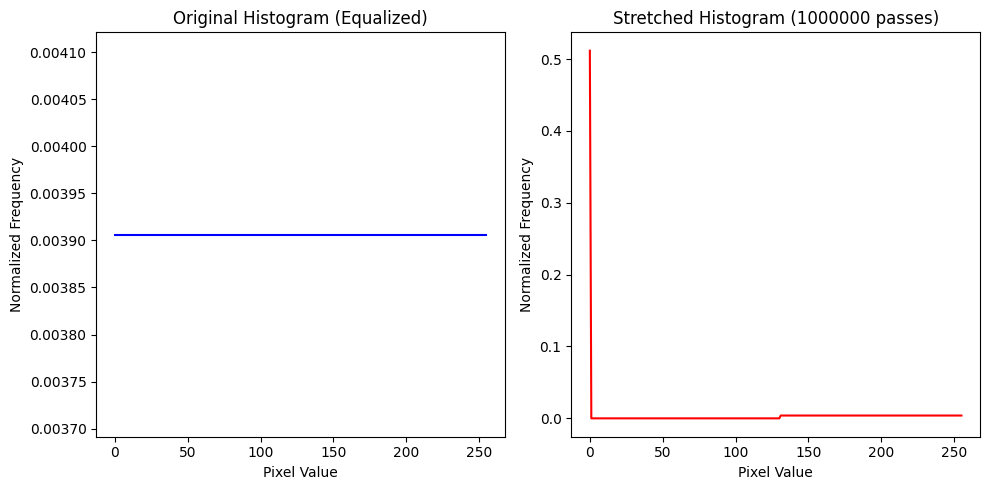

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a perfectly equalized 8-bit input image
equalized_image = np.arange(256, dtype=np.uint8)

# Define the contrast stretching function
def contrast_stretching(pixel_value):
    if pixel_value <= 130:
        return 0.5 * pixel_value
    else:
        return pixel_value

# Number of passes
num_passes = 1000000  # Change this to the number of passes you want

# Apply multiple passes of contrast stretching
stretched_image = equalized_image.copy()
for _ in range(num_passes):
    stretched_image = np.vectorize(contrast_stretching)(stretched_image)

# Calculate histograms
equalized_histogram, _ = np.histogram(equalized_image, bins=256, range=(0, 256), density=True)
stretched_histogram, _ = np.histogram(stretched_image, bins=256, range=(0, 256), density=True)

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(equalized_histogram, color='blue')
plt.title('Original Histogram (Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.subplot(1, 2, 2)
plt.plot(stretched_histogram, color='red')
plt.title(f'Stretched Histogram ({num_passes} passes)')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()


# Question 2

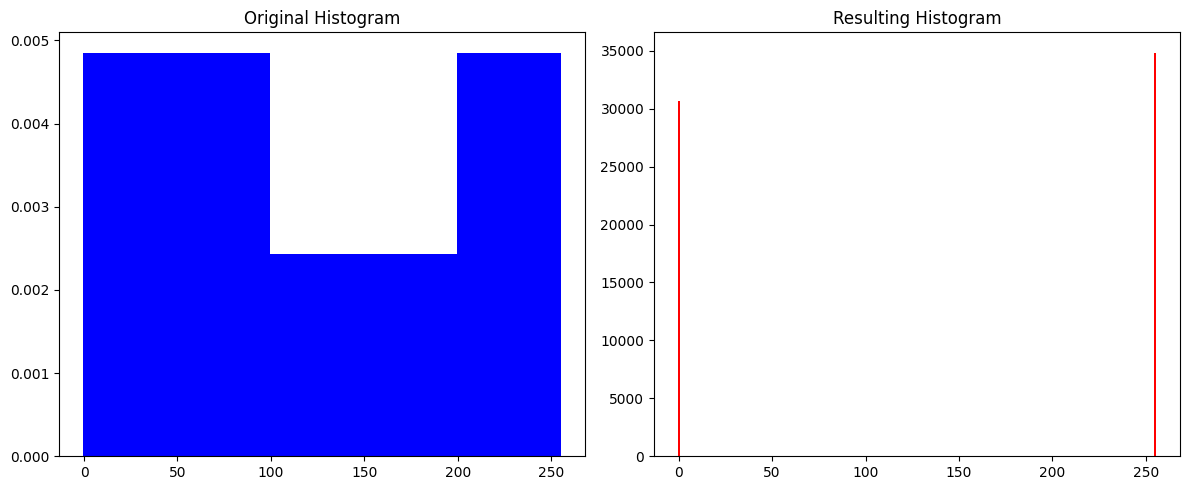

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the image
width, height = 256, 256

# Generate the histogram
histogram = np.zeros(256)
for l in range(256):
    if 0 <= l < 100 or 200 <= l < 256:
        histogram[l] = 1 / 206
    elif 100 <= l < 200:
        histogram[l] = 1 / 412

# Generate the image with the specified histogram
image = np.random.choice(range(256), size=(width, height), p=histogram)

# Perform the bit-plane slicing and convert to binary image
bit_plane_mask = 0b01000000
binary_image = np.where((image & bit_plane_mask) != 0, 255, 0).astype(np.uint8)

# Calculate the histogram of the resulting binary image
output_histogram = np.histogram(binary_image, bins=256, range=(0, 256))[0]

# Plot the original and resulting histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(256), histogram, width=1, color='b')
plt.title("Original Histogram")
plt.subplot(1, 2, 2)
plt.bar(range(256), output_histogram, width=1, color='r')
plt.title("Resulting Histogram")
plt.tight_layout()
plt.show()


# Question 3


In [ ]:
from PIL import Image
import numpy as np

# Load the input image (alien.png)
input_image = Image.open('frog.jpg')

# Function for bilinear interpolation
def bilinear_interpolation(image, x, y):
    x0, y0 = int(x), int(y)
    x1, y1 = x0 + 1, y0 + 1

    # Ensure the points are within the image bounds
    x0 = min(max(x0, 0), image.width - 1)
    x1 = min(max(x1, 0), image.width - 1)
    y0 = min(max(y0, 0), image.height - 1)
    y1 = min(max(y1, 0), image.height - 1)

    # Interpolation weights
    alpha = x - x0
    beta = y - y0

    # Get pixel values of the four neighboring pixels
    pixel00 = np.array(image.getpixel((x0, y0)))
    pixel01 = np.array(image.getpixel((x0, y1)))
    pixel10 = np.array(image.getpixel((x1, y0)))
    pixel11 = np.array(image.getpixel((x1, y1)))

    # Perform bilinear interpolation for each channel (R, G, B)
    interpolated_pixel = (1 - alpha) * (1 - beta) * pixel00 + alpha * (1 - beta) * pixel10 + (1 - alpha) * beta * pixel01 + alpha * beta * pixel11

    return tuple(interpolated_pixel.astype(np.uint8))

# Resize function using bilinear interpolation
def resize_image_bilinear(image, k):
    new_width = image.width * k
    new_height = image.height * k
    output_image = Image.new('RGB', (new_width, new_height))

    for x in range(new_width):
        for y in range(new_height):
            source_x = x / k
            source_y = y / k
            output_image.putpixel((x, y), bilinear_interpolation(image, source_x, source_y))

    return output_image

# Resize with k=2 and k=3
output_image_k2 = resize_image_bilinear(input_image, k=2)
output_image_k3 = resize_image_bilinear(input_image, k=3)

# Save the resized images
output_image_k2.save('frog_resized_k2.png')
output_image_k3.save('frog_resized_k3.png')


# Question 4


In [ ]:
import cv2
import numpy as np

# Load grayscale images
image_a = cv2.imread('4A.jpg', cv2.IMREAD_GRAYSCALE)
image_b = cv2.imread('4B.jpg', cv2.IMREAD_GRAYSCALE)
image_c = cv2.imread('4C.jpg', cv2.IMREAD_GRAYSCALE)
image_d = cv2.imread('4D.jpg', cv2.IMREAD_GRAYSCALE)

# Resize all images to a common size
common_size = (154, 162)  # Adjust to the desired common size
image_a = cv2.resize(image_a, common_size)
image_b = cv2.resize(image_b, common_size)
image_c = cv2.resize(image_c, common_size)
image_d = cv2.resize(image_d, common_size)

# Calculate Mean Squared Error (MSE) between A and B
mse_ab = np.mean((image_a - image_b) ** 2)
print(f'MSE between A and B: {mse_ab}')

# Calculate MSE between A and C
mse_ac = np.mean((image_a - image_c) ** 2)
print(f'MSE between A and C: {mse_ac}')

# Calculate MSE between A and D
mse_ad = np.mean((image_a - image_d) ** 2)
print(f'MSE between A and D: {mse_ad}')


MSE between A and B: 15.448653198653199
MSE between A and C: 87.17688792688793
MSE between A and D: 108.2351290684624


# Extra Credit

In [ ]:
import cv2
from skimage import io, transform
from skimage.metrics import structural_similarity as ssim

# Load the images
imageA = io.imread('faceA.png', as_gray=True)
imageB = io.imread('faceB.png', as_gray=True)
imageC = io.imread('faceC.png', as_gray=True)
imageD = io.imread('faceD.png', as_gray=True)

# Resize images to a common size (e.g., 256x256)
common_size = (256, 256)
imageA = transform.resize(imageA, common_size)
imageB = transform.resize(imageB, common_size)
imageC = transform.resize(imageC, common_size)
imageD = transform.resize(imageD, common_size)

# Calculate the SSIM between imageA and imageB, imageC, and imageD
ssim_AB = ssim(imageA, imageB)
ssim_AC = ssim(imageA, imageC)
ssim_AD = ssim(imageA, imageD)

# Print the SSIM values
print(f'SSIM between face A and face B: {ssim_AB}')
print(f'SSIM between face A and face C: {ssim_AC}')
print(f'SSIM between face A and face D: {ssim_AD}')


SSIM between face A and face B: 0.6839355230137222
SSIM between face A and face C: 0.5239003600781085
SSIM between face A and face D: 0.5550561871754917
